# 02. 분류

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

## 2-1. 로지스틱 회귀
### 이진 분류

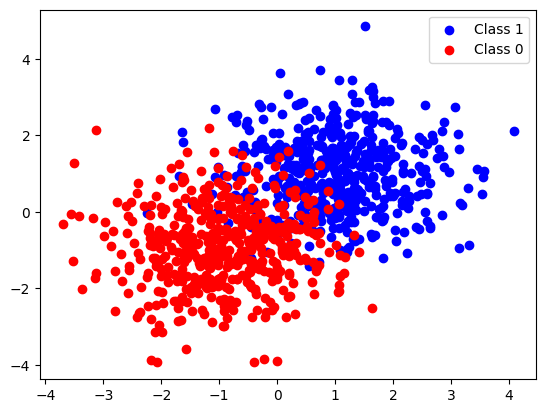

In [8]:
# 1. 데이터 입출력 정의
np.random.seed(42) # 시드 고정
num_samples = 1000

# 가우시안 샘플 생성
# 평균이 (1,1)인 2D 정규분포
mean_1 = np.array([1., 1.])
cov_1 = np.array([[1,0], [0,1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

mean_2 = np.array([-1., -1.])
cov_2 = np.array([[1,0], [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)

# 데이터 확인
plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1")
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0")
plt.legend()
plt.show()

# 데이터 정의 및 텐서로 저노한
data = np.vstack((data_1, data_2))
labels = np.ones(num_samples)
labels[num_samples//2: ] = 0

data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
labels = labels.view(-1, 1)
num_samples, num_features = data.shape

# 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out
    
model = LogisticRegression(2, 1)

# 3. 손실함수 정의
criterion = nn.BCELoss()
